In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv("data.csv")
y = df['heart disease']
X = df.drop('heart disease', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train accuracy :  1.0
test accuracy :  0.5925925925925926
              precision    recall  f1-score   support

           0       0.69      0.61      0.65        33
           1       0.48      0.57      0.52        21

    accuracy                           0.59        54
   macro avg       0.58      0.59      0.58        54
weighted avg       0.61      0.59      0.60        54

roc auc score :  0.5887445887445888


<Axes: >

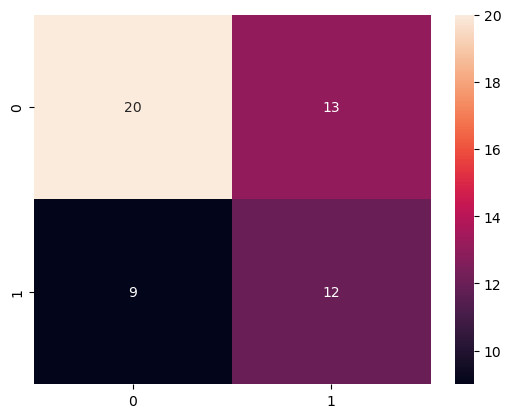

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("train accuracy : ", accuracy_score(y_train, clf.predict(X_train)))
y_pred = clf.predict(X_test)
print("test accuracy : ", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("roc auc score : ", roc_auc_score(y_test, y_pred))

import seaborn as sns 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')


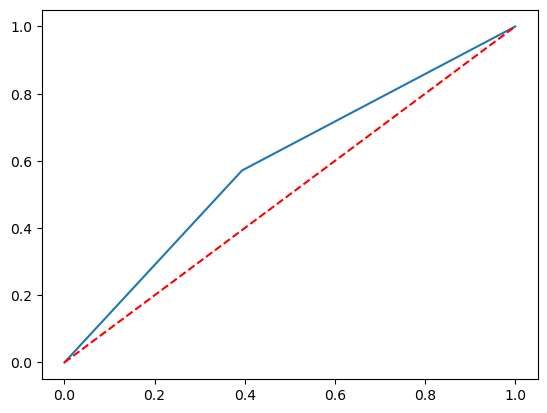

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.show()


In [12]:
clf1 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=10)
clf1.fit(X_train, y_train)

print("test accuracy now: ", accuracy_score(y_test, clf1.predict(X_test)))

test accuracy now:  0.6851851851851852


accuracy increased so it was overfitting as bias was low and variance is high

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                 
    scoring='accuracy',   
    n_jobs=-1,            
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV Score: 0.6991543340380549
Test Accuracy: 0.6481481481481481


In [21]:
import numpy as np

misclassified_idx = np.where(y_test != y_pred)[0]
correctly_classified_idx = np.where(y_test == y_pred)[0]

print("Number of misclassified patients:", len(misclassified_idx))
print("Number of correctly classified patients:", len(correctly_classified_idx))

print("\nFeature means for misclassified patients:")
print(X_test.iloc[misclassified_idx].mean())

print("\nFeature means for correctly classified patients:")
print(X_test.iloc[correctly_classified_idx].mean())

Number of misclassified patients: 19
Number of correctly classified patients: 35

Feature means for misclassified patients:
age            53.947368
sex             0.684211
BP            132.263158
cholestrol    234.473684
dtype: float64

Feature means for correctly classified patients:
age            52.657143
sex             0.542857
BP            128.228571
cholestrol    254.857143
dtype: float64


In [24]:
print("\nAverage age of misclassified patients:", X_test.iloc[misclassified_idx]["age"].mean())
print("Average age of correctly classified patients:", X_test.iloc[correctly_classified_idx]["age"].mean())

print("\nAverage BP of misclassified patients:", X_test.iloc[misclassified_idx]["BP"].mean())
print("Average BP of correctly classified patients:", X_test.iloc[correctly_classified_idx]["BP"].mean())

print("\nAverage Cholesterol of misclassified patients:", X_test.iloc[misclassified_idx]["cholestrol"].mean())
print("Average Cholesterol of correctly classified patients:", X_test.iloc[correctly_classified_idx]["cholestrol"].mean())



Average age of misclassified patients: 53.94736842105263
Average age of correctly classified patients: 52.65714285714286

Average BP of misclassified patients: 132.26315789473685
Average BP of correctly classified patients: 128.22857142857143

Average Cholesterol of misclassified patients: 234.47368421052633
Average Cholesterol of correctly classified patients: 254.85714285714286


average is changing in a good amount in cholestrol so it is mis-guiding

In [ ]:
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))  # normalize=True gives percentages


Training set class distribution:
heart disease
0    117
1     99
Name: count, dtype: int64

Test set class distribution:
heart disease
0    0.611111
1    0.388889
Name: proportion, dtype: float64


In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("\nAfter SMOTE:", pd.Series(y_train_res).value_counts())


Before SMOTE: heart disease
0    117
1     99
Name: count, dtype: int64

After SMOTE: heart disease
0    117
1    117
Name: count, dtype: int64


In [27]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2, min_samples_split=2)
clf2.fit(X_train, y_train)

print(classification_report(y_test, clf2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        33
           1       0.52      0.52      0.52        21

    accuracy                           0.63        54
   macro avg       0.61      0.61      0.61        54
weighted avg       0.63      0.63      0.63        54

